In [1]:
import sys
sys.path.append('/Users/tong/soundscape_IR/soundscape_viewer')
import numpy as np 
import pandas as pd
import pickle, glob
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.dates as mdates
from soundscape_viewer import lts_viewer
from soundscape_viewer import data_organize, matrix_operation, clustering
from utility import matrix_operation

In [33]:
year = '2021'
place = 'Keelung'
LTS=lts_viewer(path=f'/Volumes/home/DataBase/PAM_pickle/{year}/', place=place)
input_data, f, time = LTS.input_selection('median', prewhiten_percent=20, f_range=[100,48000])#

/Volumes/home/DataBase/PAM_pickle/2021/
['/Volumes/home/DataBase/PAM_pickle/2021/Keelung_051900-060611-5min.pkl', '/Volumes/home/DataBase/PAM_pickle/2021/Keelung_070100-071811-5min.pkl', '/Volumes/home/DataBase/PAM_pickle/2021/Keelung_082300-091910-5min.pkl']
Loading file: /Volumes/home/DataBase/PAM_pickle/2021/Keelung_051900-060611-5min.pkl
(5316, 512)
Loading file: /Volumes/home/DataBase/PAM_pickle/2021/Keelung_070100-071811-5min.pkl
(5038, 512)
Loading file: /Volumes/home/DataBase/PAM_pickle/2021/Keelung_082300-091910-5min.pkl
(5312, 512)
(15666, 511)


(<Figure size 2000x300 with 2 Axes>, <Axes: ylabel='Frequency'>)

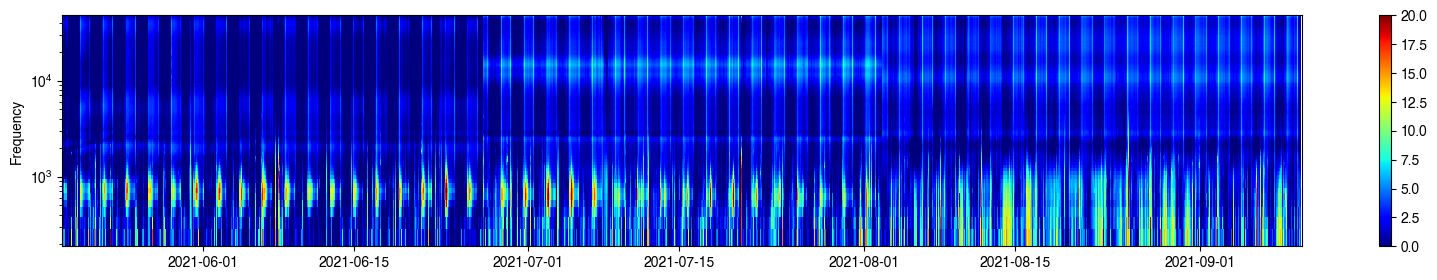

In [34]:

if f.shape[0] == 510:
    modified_f = []

    for i in range(int(f.shape[0]/2)):
        ii = 2*i+1
        modified_f.append(f[ii])
    modified_f = np.array(modified_f)
    
    modified_input_data = np.zeros([input_data.shape[0], int(f.shape[0]/2)])
    for j in range(input_data.shape[0]):
        for i in  range(int(f.shape[0]/2)):
            modified_input_data[j,i] = input_data[j,2*i+1]
            
    if modified_f.shape[0] == 255 and modified_input_data.shape[1] == 255:
        f = modified_f
        input_data = modified_input_data
        clear_model_W = True 
        print()
        print('downsampling frequency ')
        print(input_data.shape)
        print()

if time.shape[0] > input_data.shape[0]:
    print('time problem')
    time = time[1:]
    
matrix_operation().plot_lts(input_data, f, time, vmin=0, vmax=20, fig_width=20, fig_height=3, lts=False)

In [26]:
if place == 'Keelung':
    print(place)
    stages= 4 if year == 2023 else 3
    # file = open('../Results/soundsepration/Keelung/20231116_151017_3stages_separation/model_array.pkl' , 'rb')
    path = glob.glob(f'../Results/soundsepration/Keelung-5min/202?*_{year}_{stages}stage_separation/model_array.pkl')[0]
    print(path)
    file = open(path , 'rb')
    model = pickle.load(file)
    file.close()
elif place == 'Taoyuan':
    print(place)
    # 30 min resolution
    # file = open('../Results/soundsepration/Taoyuan/20231120_112318_3stage_separation_combined/model_array.pkl' , 'rb')
    # 5 min resolution 
    
    stages = 4 if year == 2023 else 3
    path = glob.glob(f'../Results/soundsepration/Taoyuan-5min/202?*_{year}_{stages}stage_separation/model_array.pkl')[0]
    print(path)
    file = open(path , 'rb')
    model = pickle.load(file)
    file.close()
    
    if year == 2022:
        import datetime
        time = np.hstack([time, datetime.datetime(2022, 8, 25, 16, 55)])        

Keelung
../Results/soundsepration/Keelung-5min/20240129_100849_2022_3stage_separation/model_array.pkl


In [20]:
# save = False

# analysis_result=data_organize()
# s = 1
# print(f'Source: {s}; Fish ')
# model['relative_level'][s-1]=model['relative_level'][s-1]-np.min(model['relative_level'][s-1])
# model['relative_level'][s-1]=model['relative_level'][s-1]/np.max(model['relative_level'][s-1])
# analysis_result.time_fill(time_vec=time, data=model['relative_level'][s-1], header=f'S{s}_level')
# value_k = 0.90 if s == 0 else 0.95
# cluster_result=clustering(pca_percent=0.95, k=value_k)
# cluster_result.run(input_data=model['separation'][s-1], f=f, time=time,standardization='max-min')    #
# if save:
#     savepath = path.rsplit('/', 1)[0]
#     cluster_result.save_cluster_feature(filename=f'{savepath}/{place}_S{s}_cluster_scene_features_nostd.csv')
# analysis_result.time_fill(time_vec=cluster_result.time_vec, data=cluster_result.cluster, header=f'S{s}_Cluster')

# print()
# print()


In [28]:
from sklearn.preprocessing import MinMaxScaler
if place == 'Taoyuan':
    timelist = [3996, 4720+3996, 13386]
    # [5073,6644+5073,16733]## Taoyuan 2022
    # [4953, 9441, 13905, 19137] ## Taoyuan 2023 
elif place == 'Keelung':
    timelist = [5760, 5472+5760, 15840]
    #[5316, 5316+5038, 15666] ## Keelung 2022
    #[4603, 4603+4776, 4603+4776+4524, 4603+4776+4524+6396] ## Keelung 2023

s=1
save = False
analysis_result=data_organize()
for i in range(len(timelist)):
    t = timelist[i]
    if i == 0:
        model['relative_level'][s-1][:t]=model['relative_level'][s-1][:t]-np.min(model['relative_level'][s-1][:t])
        model['relative_level'][s-1][:t]=model['relative_level'][s-1][:t]/np.max(model['relative_level'][s-1][:t])
        scaler = MinMaxScaler()
        model['separation'][s-1][:t,:] = scaler.fit_transform(model['separation'][s-1][:t,:])
        # model['separation'][s-1][:t,:] =model['separation'][s-1][:t,:] -np.matlib.repmat(model['separation'][s-1][:t,:].min(axis=1), model['separation'][s-1][:t,:].shape[1],1).T
        # model['separation'][s-1][:t,:]=np.divide(model['separation'][s-1][:t,:], np.matlib.repmat(model['separation'][s-1][:t,:].max(axis=1), model['separation'][s-1][:t,:].shape[1], 1).T)      

    else:
        pt = timelist[i-1]
        model['relative_level'][s-1][pt:t]=model['relative_level'][s-1][pt:t]-np.min(model['relative_level'][s-1][pt:t])
        model['relative_level'][s-1][pt:t]=model['relative_level'][s-1][pt:t]/np.max(model['relative_level'][s-1][pt:t])
        scaler = MinMaxScaler()
        model['separation'][s-1][pt:t,:] = scaler.fit_transform(model['separation'][s-1][pt:t,:])
        # model['separation'][s-1][pt:t,:] =model['separation'][s-1][pt:t,:] -np.matlib.repmat(model['separation'][s-1][pt:t,:].min(axis=1), model['separation'][s-1][pt:t,:].shape[1],1).T
        # model['separation'][s-1][pt:t,:]=np.divide(model['separation'][s-1][pt:t,:], np.matlib.repmat(model['separation'][s-1][pt:t,:].max(axis=1), model['separation'][s-1][pt:t,:].shape[1], 1).T)       
analysis_result.time_fill(time_vec=time, data=model['relative_level'][s-1], header=f'S{s}_level')

value_k = 0.90 if s == 0 else 0.95
cluster_result=clustering(pca_percent=0.95, k=value_k)#value_k)
cluster_result.run(input_data=model['separation'][s-1], f=f, time=time)    #
if save:
    savepath = path.rsplit('/', 1)[0]
    cluster_result.save_cluster_feature(filename=f'{savepath}/result_normalized_each_stage/{place}_S{s}_cluster_scene_features_std_each_stage.csv') 
analysis_result.time_fill(time_vec=cluster_result.time_vec, data=cluster_result.cluster, header=f'S{s}_Cluster')

if save:
    analysis_result.save_csv(f'{savepath}/result_normalized_each_stage/{place}_S{s}_cluster_std_each_stage.csv')

A new spreadsheet has been created.
dimension reduction by PCA ......
comp: 2, ratio:[0.941284   0.02398629]
Begining to cluster ......
k: 1 , explained variation: 0.0
k: 2 , explained variation: 0.7080820425018113
k: 3 , explained variation: 0.8436849637298587
k: 4 , explained variation: 0.9067104583560778
k: 5 , explained variation: 0.932302985672939
k: 6 , explained variation: 0.9490426308839235
k: 7 , explained variation: 0.9574097533623334
Final trial: run  7  clusters
Successifully save to ../Results/soundsepration/Keelung-5min/20240129_100849_2022_3stage_separation/result_normalized_each_stage/Keelung_S1_cluster_scene_features_std_each_stage.csv
Successifully save to ../Results/soundsepration/Keelung-5min/20240129_100849_2022_3stage_separation/result_normalized_each_stage/Keelung_S1_cluster_std_each_stage.csv


Index(['Time', 'S1_level', 'S1_Cluster'], dtype='object')
adding 1 day
123


<Figure size 640x480 with 0 Axes>

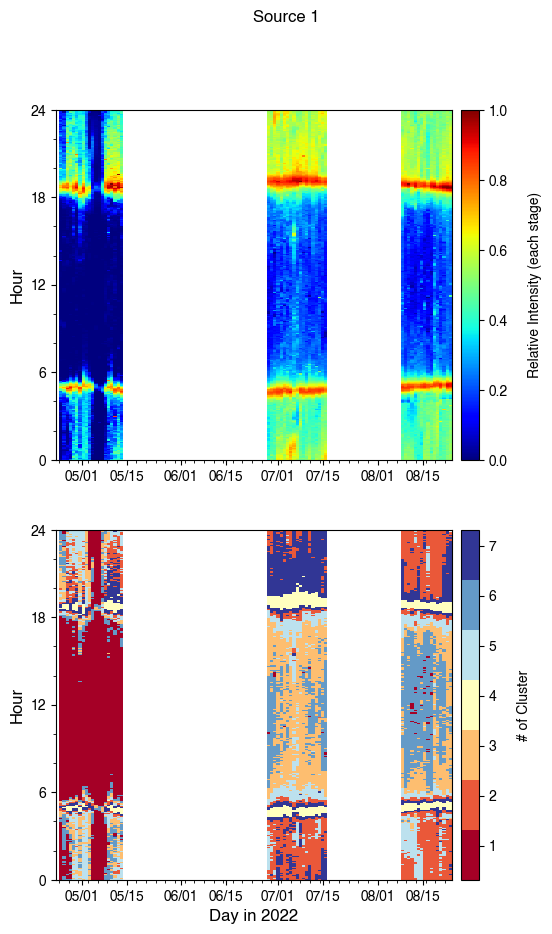

In [29]:
# Investigate the diurnal (y-axis) and seasonal change (x-axis) of source behavior
for i in [s]:# range(1, 5):
    if i  == 0 :
        level, cluster = analysis_result.plot_diurnal(col=i, savefig = save, vmax=0.3, vmin=0,
                                                 file = f'{savepath}/result_normalized_each_stage/{place}_{year}_diurnal_variations_std_each_stage', 
                                                  nan_value=-1,
                                                  ) 
    else:
        level, cluster = analysis_result.plot_diurnal(col=i, savefig = save,
                                         file = f'{savepath}/result_normalized_each_stage/{place}_{year}_diurnal_variations_std_each_stage', 
                                          nan_value=-1,
                                          ) 